In [ ]:
!pip install yfinance # installing yahoo finance library

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Gathering adjusted closing data for 5 Indian listed companies from 2019 uptill today
tickers = ['RELIANCE.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'TATAELXSI.NS',  'ADANITRANS.NS','ATGL.NS']
start = dt.datetime(2019,1,1)
end = dt.datetime.now()
df= yf.download(tickers , start , end)['Adj Close']
df.to_csv('project.csv')
df = pd.read_csv('project.csv')
df.head()

[*********************100%***********************]  6 of 6 completed


,Date,ADANIENT.NS,ADANITRANS.NS,ATGL.NS,BAJFINANCE.NS,RELIANCE.NS,TATAELXSI.NS
0,2019-01-01,155.465103,200.500000,101.360382,2632.266113,1096.699097,966.420044
1,2019-01-02,153.092346,200.550003,99.967110,2589.862061,1082.415405,964.584717
2,2019-01-03,150.769012,201.149994,100.365189,2562.269531,1069.061401,969.196716
3,2019-01-04,150.818451,200.100006,100.365189,2552.213867,1074.833618,944.912720
4,2019-01-07,149.533203,199.800003,101.161346,2529.971436,1080.801270,920.958130


In [ ]:
# calculating daily return for the companies using the adjusted closing data 
new_df = df[['RELIANCE.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'TATAELXSI.NS', 'ATGL.NS', 'ADANITRANS.NS']].copy()
returns = new_df.pct_change(periods = 1).dropna()
log_returns =np.log(new_df / new_df.shift(1))
returns.head()

,RELIANCE.NS,BAJFINANCE.NS,ADANIENT.NS,TATAELXSI.NS,ATGL.NS,ADANITRANS.NS
1,-0.013024,-0.016109,-0.015262,-0.001899,-0.013746,0.000249
2,-0.012337,-0.010654,-0.015176,0.004781,0.003982,0.002992
3,0.005399,-0.003925,0.000328,-0.025056,0.000000,-0.005220
4,0.005552,-0.008715,-0.008522,-0.025351,0.007933,-0.001499
5,-0.000091,-0.006481,0.014545,-0.006337,-0.005411,0.030781


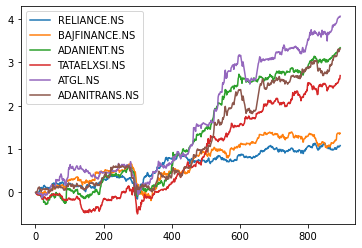

In [ ]:
# plotting cumulative returns to see performamce of the stocks graphically
cumulative = returns.cumsum(axis = 0)
cumulative.plot()
plt.show()

In [ ]:
# calculating average daily returns for the stocks and assuming them to be the expected return
avg_return = returns.mean()
avg_return

RELIANCE.NS      0.001207
BAJFINANCE.NS    0.001525
ADANIENT.NS      0.003735
TATAELXSI.NS     0.003015
ATGL.NS          0.004549
ADANITRANS.NS    0.003706
dtype: float64

In [ ]:
# creating a function to plot VaR and also calculate the same
def func(ticker):
    stock = returns[ticker]
    axis = plt.subplot()
    axis = stock.plot(kind = 'hist' , bins = 150 ,ax=axis)
    axis.axvline(np.percentile(stock, 5), color='orange')
    axis.set_title(ticker.split('.')[0], loc='left', fontsize=16)
    plt.show()
    var = np.percentile(stock, 5 , axis = 0)
    var = round(var* -100 , 3)
    print('The 95% Daily Historical VaR is {} %'.format(var))

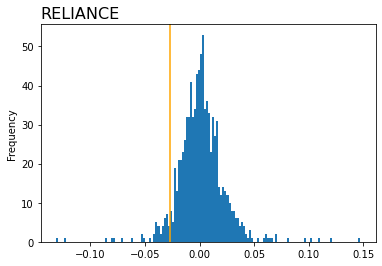

The 95% Daily Historical VaR is 2.74 %


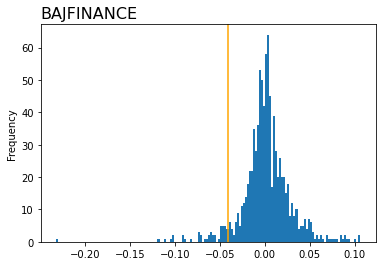

The 95% Daily Historical VaR is 4.106 %


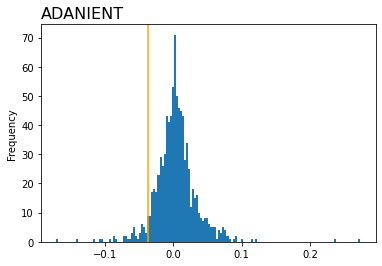

The 95% Daily Historical VaR is 3.702 %


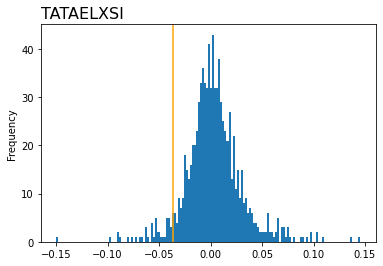

The 95% Daily Historical VaR is 3.684 %


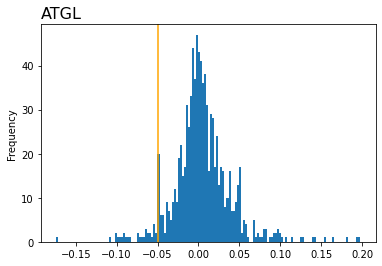

The 95% Daily Historical VaR is 4.996 %


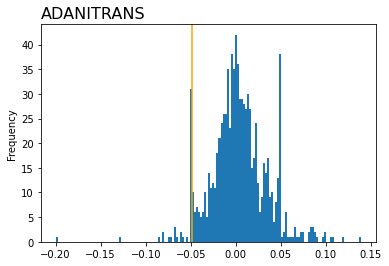

The 95% Daily Historical VaR is 4.883 %


In [ ]:
# function call for all the stocks
for col in returns.columns:
    func(col)

In [ ]:
log_returns = log_returns.dropna()
log_returns.head()

,RELIANCE.NS,BAJFINANCE.NS,ADANIENT.NS,TATAELXSI.NS,ATGL.NS,ADANITRANS.NS
1,-0.013110,-0.016240,-0.015380,-0.001901,-0.013841,0.000249
2,-0.012414,-0.010711,-0.015292,0.004770,0.003974,0.002987
3,0.005385,-0.003932,0.000328,-0.025375,0.000000,-0.005234
4,0.005537,-0.008753,-0.008558,-0.025678,0.007901,-0.001500
5,-0.000091,-0.006502,0.014441,-0.006357,-0.005425,0.030317


In [ ]:
# calculating portfolio returns assuming equal weightage for all stocks
log_returns['portfolio'] = (log_returns.sum(axis=1)/6.0)
log_returns.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RELIANCE.NS,BAJFINANCE.NS,ADANIENT.NS,TATAELXSI.NS,ATGL.NS,ADANITRANS.NS,portfolio
1,-0.013110,-0.016240,-0.015380,-0.001901,-0.013841,0.000249,-0.010037
2,-0.012414,-0.010711,-0.015292,0.004770,0.003974,0.002987,-0.004448
3,0.005385,-0.003932,0.000328,-0.025375,0.000000,-0.005234,-0.004805
4,0.005537,-0.008753,-0.008558,-0.025678,0.007901,-0.001500,-0.005175
5,-0.000091,-0.006502,0.014441,-0.006357,-0.005425,0.030317,0.004397


In [ ]:
volatility = log_returns.std(axis =0 )
volatility

RELIANCE.NS      0.021314
BAJFINANCE.NS    0.027781
ADANIENT.NS      0.030565
TATAELXSI.NS     0.027204
ATGL.NS          0.034582
ADANITRANS.NS    0.031319
portfolio        0.019391
dtype: float64

In [ ]:
# Sharpe ratio calculation of equal weighted portfolio
sharpe_ratio = (log_returns.mean(axis=0) - (0.05/250.0)) / volatility
sharpe_ratio = sharpe_ratio*np.sqrt(250)
sharpe_ratio

RELIANCE.NS      0.578384
BAJFINANCE.NS    0.536374
ADANIENT.NS      1.582547
TATAELXSI.NS     1.418254
ATGL.NS          1.708927
ADANITRANS.NS    1.519622
portfolio        1.898436
dtype: float64

In [ ]:
log_returns = log_returns.drop(['portfolio'],axis = 1)

In [ ]:
def max_sharpe(weight):
    # expected return
    exp_return = 0
    exp_return = np.sum(log_returns.mean(axis=0) @ weight)

    # expected volatility
    exp_volatility = 0
    exp_volatility = np.sqrt(np.dot(weight.T,np.dot(log_returns.cov(), weight)))

    # Sharpe Ratio
    SR = (exp_return - (0.05/250.0))*np.sqrt(250)/exp_volatility
    return SR , exp_return , exp_volatility ;

In [ ]:
iterations = 50000
sharpe = pd.DataFrame(columns = ['SR', 'exp_ret', 'exp_vol']) 
for i in range(iterations):
    weight = np.array(np.random.random(6))
    weight = weight/np.sum(weight)
    SR , exp_return , exp_volatility = max_sharpe(weight) 
    sharpe = sharpe.append({'SR' : SR, 'exp_ret' : exp_return , 'exp_vol' : exp_volatility}, ignore_index = True)

In [ ]:
print(sharpe.max()['SR'])

2.151526922895918


In [ ]:
position = sharpe.SR.argmax()
max_vol = sharpe._get_value(position,'exp_vol')
max_ret = sharpe._get_value(position,'exp_ret')

Text(0, 0.5, 'Return')

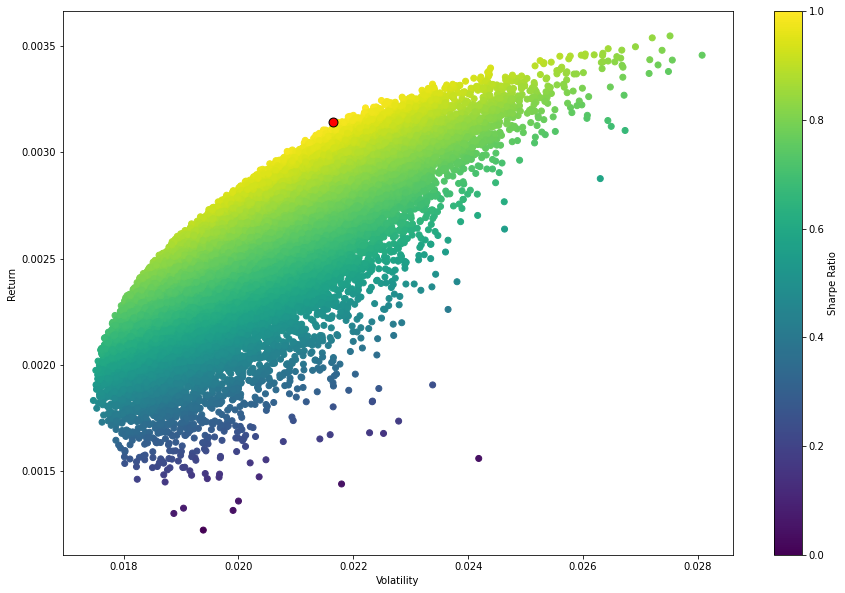

In [ ]:
# plot the data
plt.figure(figsize=(15,10))
plt.scatter(sharpe.exp_vol,sharpe.exp_ret,c=sharpe.SR)
plt.scatter(max_vol, max_ret, c='red', s=80, edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')